In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import mean_squared_error

In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("C:\\Users\\kasuk\\OneDrive\\Desktop\\python files\\facebook stock.csv",parse_dates=['Date'],usecols=['Date','Open','Close'],index_col=['Date'])

In [8]:
data.head()

,Open,Close
Date,,
2012-05-18,42.049999,38.230000
2012-05-21,36.529999,34.029999
2012-05-22,32.610001,31.000000
2012-05-23,31.370001,32.000000
2012-05-24,32.950001,33.029999


In [9]:
data.shape

(2359, 2)

In [10]:
data.isnull().sum()

Open     0
Close    0
dtype: int64

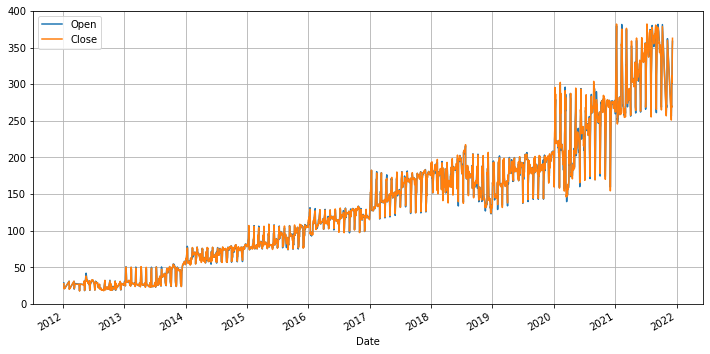

In [11]:
data.plot(figsize=(12,6))
plt.grid()

In [12]:
data['Open'].corr(data['Close'])

0.9995789163241976

In [13]:
scaler=MinMaxScaler()

In [14]:
data=scaler.fit_transform(data)

In [15]:
fstock=pd.DataFrame(data,columns=['Open','Close'])


In [16]:
fstock.head()

,Open,Close
0,0.065924,0.056249
1,0.050743,0.044725
2,0.039961,0.036411
3,0.036551,0.039155
4,0.040897,0.041981


In [17]:
fstock.shape

(2359, 2)

In [18]:
train=fstock[:1800]
test=fstock[1800:]

In [19]:
#from keras.utils import to_categorical
#train=to_categorical(train)
#test=to_categorical(test)

In [94]:
features=train[['Open','Close']].to_numpy()
generator=TimeseriesGenerator(features,features,length=7,batch_size=1)
x,y=generator[0]
print(f'given:{x}')
print(f'predict :{y}')

given:[[[0.06592409 0.05624914]
  [0.05074257 0.04472493]
  [0.0399615  0.03641103]
  [0.03655116 0.03915489]
  [0.04089659 0.04198107]
  [0.04075908 0.03890795]
  [0.03685369 0.03048429]]]
predict :[[0.02920792 0.02870079]]


In [95]:
len(generator)

1793

In [96]:
features=test[['Open','Close']].to_numpy()
test_generator=TimeseriesGenerator(features,features,length=1,batch_size=1)
x,y=generator[0]
print(f'given:{x}')
print(f'predict :{y}')

given:[[[0.06592409 0.05624914]
  [0.05074257 0.04472493]
  [0.0399615  0.03641103]
  [0.03655116 0.03915489]
  [0.04089659 0.04198107]
  [0.04075908 0.03890795]
  [0.03685369 0.03048429]]]
predict :[[0.02920792 0.02870079]]


In [97]:
len(test_generator)

558

In [98]:
train.shape

(1800, 2)

In [49]:
model=Sequential()

In [50]:
model.add(SimpleRNN(128,activation='relu',input_shape=(5,2)))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [51]:
model.compile(loss='mse',optimizer='adam')

In [52]:
history=model.fit_generator(generator,epochs=10)

Epoch 1/10
1794/1794 [==============================] - 7s 3ms/step - loss: 0.0024
Epoch 2/10
1794/1794 [==============================] - 5s 3ms/step - loss: 2.7544e-04
Epoch 3/10
1794/1794 [==============================] - 5s 3ms/step - loss: 2.0196e-04
Epoch 4/10
1794/1794 [==============================] - 5s 3ms/step - loss: 1.7219e-04
Epoch 5/10
1794/1794 [==============================] - 5s 3ms/step - loss: 1.1780e-04
Epoch 6/10
1794/1794 [==============================] - 5s 3ms/step - loss: 1.1252e-04
Epoch 7/10
1794/1794 [==============================] - 5s 3ms/step - loss: 8.1866e-05
Epoch 8/10
1794/1794 [==============================] - 5s 3ms/step - loss: 8.4494e-05
Epoch 9/10
1794/1794 [==============================] - 4s 2ms/step - loss: 7.1637e-05
Epoch 10/10
1794/1794 [==============================] - 4s 2ms/step - loss: 6.8394e-05


<AxesSubplot:>

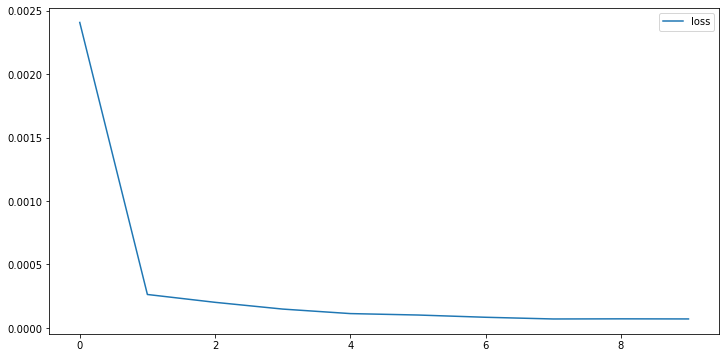

In [32]:
pd.DataFrame(history.history).plot(figsize=(12,6))

In [33]:
model.evaluate_generator(test_generator)

0.017605571076273918

In [99]:
trainpredict=model.predict_generator(generator)
trainpredict=pd.DataFrame(trainpredict)
trainpredict.columns=['Open','Close']
trainpredict.head()

,Open,Close
0,0.032988,0.033174
1,0.030647,0.030855
2,0.029195,0.029414
3,0.027638,0.027866
4,0.026163,0.026392


In [100]:
testpredict=model.predict_generator(test_generator)
testpredict=pd.DataFrame(testpredict)
testpredict.columns=['Open','Close']
testpredict

,Open,Close
0,0.508464,0.512783
1,0.506536,0.510479
2,0.505489,0.509377
3,0.507517,0.511586
4,0.508433,0.512701
...,...,...
553,0.596382,0.606081
554,0.597691,0.607490
555,0.591835,0.601459
556,0.590620,0.600177


In [101]:
len(trainpredict)

1793

<AxesSubplot:>

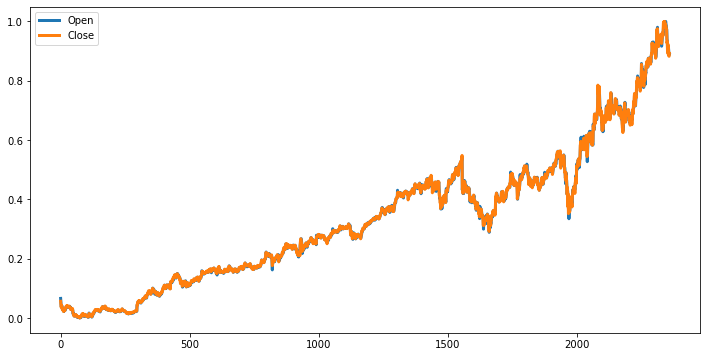

In [102]:
fstock.plot(figsize=(12,6),linewidth=3)

<AxesSubplot:>

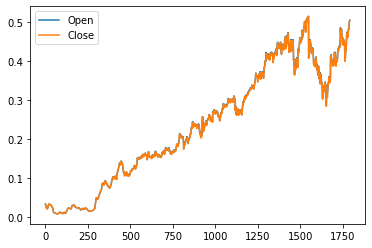

In [103]:
trainpredict.plot()

<AxesSubplot:>

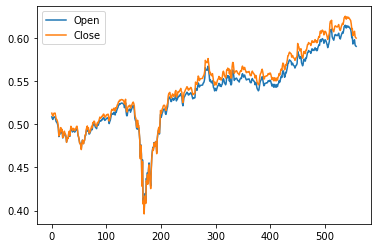

In [104]:
testpredict.plot()

In [105]:
predicted_data=pd.concat([trainpredict,testpredict],axis=0)

In [109]:
predicted_data.tail()

,Open,Close
553,0.596382,0.606081
554,0.597691,0.607490
555,0.591835,0.601459
556,0.590620,0.600177
557,0.590096,0.599622


In [110]:
predicted_data.shape

(2351, 2)

<AxesSubplot:>

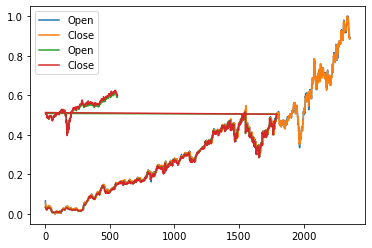

In [108]:
ax=fstock.plot()
predicted_data.plot(ax=ax)